# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = round(city_weather["main"]["temp_max"] - 273.15, 2)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crane
Processing Record 2 of Set 1 | bonthe
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | kismayo
Processing Record 7 of Set 1 | ouellah
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | extrema
Processing Record 10 of Set 1 | porto novo
Processing Record 11 of Set 1 | puerto armuelles
Processing Record 12 of Set 1 | tuy hoa
Processing Record 13 of Set 1 | ngetkib
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bela
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bethal
Processing Record 18 of Set 1 | palikir - national government center
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | muncar
Processing Record 21 of Set 1 | pagar a

Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | alvaraes
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | wewak
Processing Record 45 of Set 4 | bhimunipatnam
Processing Record 46 of Set 4 | mikkeli
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | saudarkrokur
Processing Record 49 of Set 4 | ilha de mocambique
Processing Record 0 of Set 5 | hammerfest
Processing Record 1 of Set 5 | callao
Processing Record 2 of Set 5 | gallatin
Processing Record 3 of Set 5 | bardai
Processing Record 4 of Set 5 | keflavik
Processing Record 5 of Set 5 | zhu cheng city
Processing Record 6 of Set 5 | idri
Processing Record 7 of Set 5 | new plymouth
Processing Record 8 of Set 5 | gazojak
Processing Record 9 of Set 5 | opuwo
Processing Record 10 of Set 5 | hadibu
Processing Record 11 of Set 5 | naze
Processing Record 12 of Set 5 | uturoa
Processing Record 13 of Set 5 | praia da vitoria
Processing Record 14 of Set 5 | argo
Processing R

Processing Record 30 of Set 8 | bikenibeu village
Processing Record 31 of Set 8 | las palmas
Processing Record 32 of Set 8 | faya-largeau
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | chunskiy
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | qapqal
City not found. Skipping...
Processing Record 37 of Set 8 | los alamos
Processing Record 38 of Set 8 | goundam
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | yung shue wan
Processing Record 41 of Set 8 | gillette
Processing Record 42 of Set 8 | bhuj
Processing Record 43 of Set 8 | hobyo
Processing Record 44 of Set 8 | ormara
Processing Record 45 of Set 8 | acapulco de juarez
Processing Record 46 of Set 8 | tutayev
Processing Record 47 of Set 8 | itoman
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | namtsy
Processing Record 0 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 1 of Set 9 | harstad
Processing Record 2 of Set 

Processing Record 16 of Set 12 | rudsar
Processing Record 17 of Set 12 | iglino
Processing Record 18 of Set 12 | junin de los andes
Processing Record 19 of Set 12 | chibuto
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | lerwick
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | pionerskiy
Processing Record 24 of Set 12 | kotlas
Processing Record 25 of Set 12 | mount darwin
Processing Record 26 of Set 12 | half moon bay
Processing Record 27 of Set 12 | najran
Processing Record 28 of Set 12 | tofol
Processing Record 29 of Set 12 | kralendijk
Processing Record 30 of Set 12 | brainerd
Processing Record 31 of Set 12 | chandler
Processing Record 32 of Set 12 | flying fish cove
Processing Record 33 of Set 12 | wajir
Processing Record 34 of Set 12 | simanggang
Processing Record 35 of Set 12 | hauterive
Processing Record 36 of Set 12 | thunder bay
Processing Record 37 of Set 12 | kampene
Processing Record 38 of Set 12 | ivdel'
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,crane,31.3974,-102.3501,19.47,11,3,2.72,US,1712545631
1,bonthe,7.5264,-12.5050,25.82,86,70,2.03,SL,1712545798
2,puerto natales,-51.7236,-72.4875,2.97,73,100,3.38,CL,1712545700
3,san antonio de pale,-1.4014,5.6325,28.24,79,91,4.33,GQ,1712545800
4,hermanus,-34.4187,19.2345,17.11,94,100,9.72,ZA,1712545641


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,19.47,11,3,2.72,US,1712545631
1,bonthe,7.5264,-12.5050,25.82,86,70,2.03,SL,1712545798
2,puerto natales,-51.7236,-72.4875,2.97,73,100,3.38,CL,1712545700
3,san antonio de pale,-1.4014,5.6325,28.24,79,91,4.33,GQ,1712545800
4,hermanus,-34.4187,19.2345,17.11,94,100,9.72,ZA,1712545641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

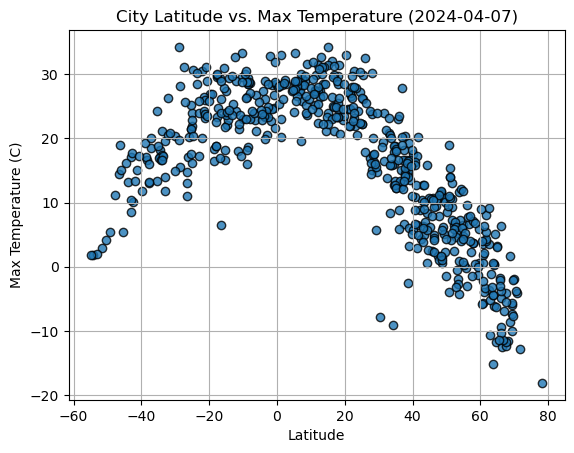

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

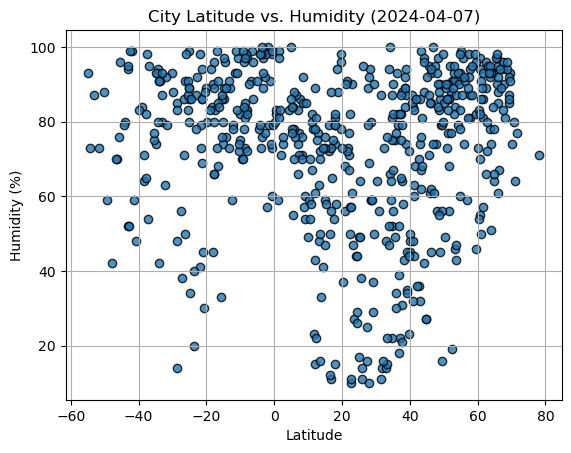

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

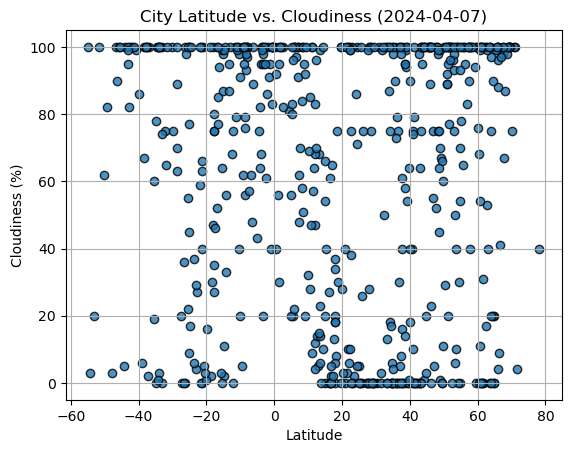

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

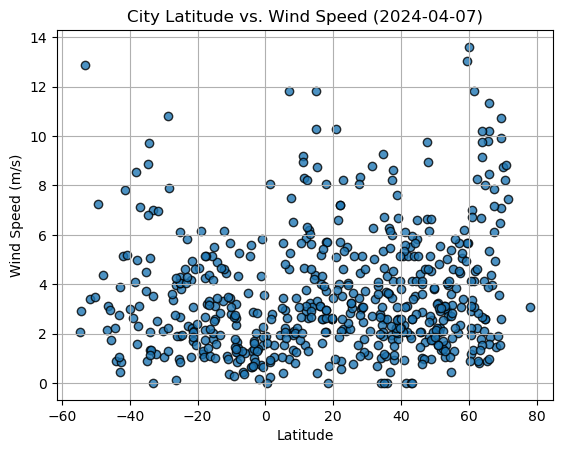

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plot
def lin_regress_plot(x, y, x_label, y_label, line_x_cord, line_y_coord):
    ''' Function takes in two columns or series of data and performs a linear regression calculation.
    
    Args:
        x: column for plotting along the x-axis,
        y: column for plotting along the y-axis,
        x_label: scatter plot x label,
        y_label: scatter plot y label,
        line_x_cord: x coordinate for regression line equation placement,
        line_y_coord: y coordinate for regression line equation placement.
    
    Returns:
        - A scatter plot using the data from the two columns.
        - A regression line plot showing the linear relationship between two sets of data.
        - The line equation for the linear regression.
    
    '''
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_y = x * slope + intercept
    print(f'The r-value is: {rvalue}')
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_y,"r", alpha=0.5)
    plt.annotate(line_equation,(line_x_cord,line_y_coord),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,19.47,11,3,2.72,US,1712545631
1,bonthe,7.5264,-12.5050,25.82,86,70,2.03,SL,1712545798
8,porto novo,6.4965,2.6036,27.29,87,97,2.61,BJ,1712545723
9,puerto armuelles,8.2833,-82.8667,28.99,71,100,1.34,PA,1712545803
10,tuy hoa,13.0833,109.3000,32.65,48,68,3.22,VN,1712545803


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,2.97,73,100,3.38,CL,1712545700
3,san antonio de pale,-1.4014,5.6325,28.24,79,91,4.33,GQ,1712545800
4,hermanus,-34.4187,19.2345,17.11,94,100,9.72,ZA,1712545641
5,kismayo,-0.3582,42.5454,28.47,79,100,3.58,SO,1712545801
6,edinburgh of the seven seas,-37.0676,-12.3116,18.47,95,100,7.14,SH,1712545591


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9020860559229729


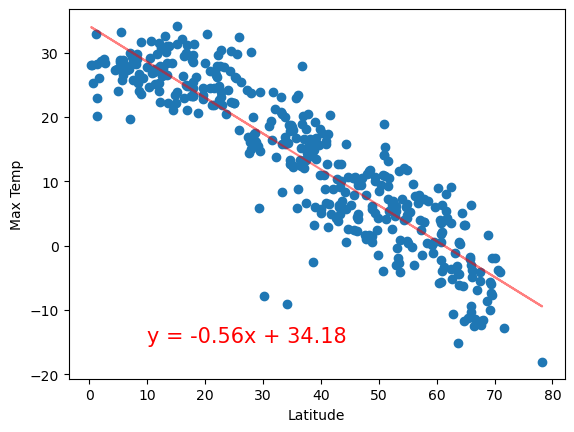

In [64]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 10, -15)

The r-value is: 0.6896617630532396


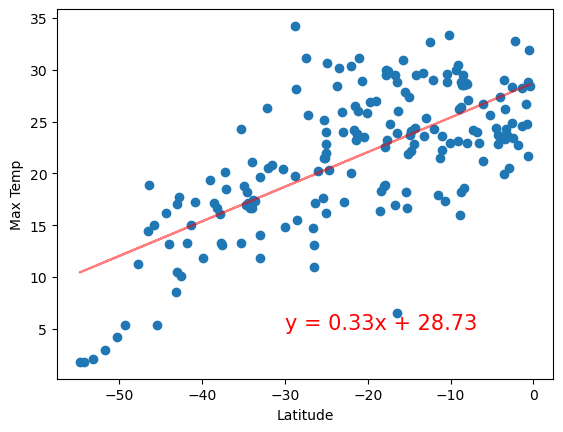

In [65]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -30, 5)

**Discussion about the linear relationship:** The Northern Hempisphere appears to have a much stronger correlation of maximum temperature to latitude (with an r-value of 0.90) compared to the Southern Hempisphere (with an r-value of 0.68). The relationship between Max Temp and Latitude in the Southern Hemisphere scatter appears to be much more variable. This is likely related to the Southern Hemisphere having more turbulent atmospheric activity due to greater surface areas of ocean (61% in the NH vs 81% in the SH) and therefore a lower proportion of land mass (generally more stable in temperature), which would impact the variability of temeratures. AS expected both show an increase in Max temp towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2665099703050191


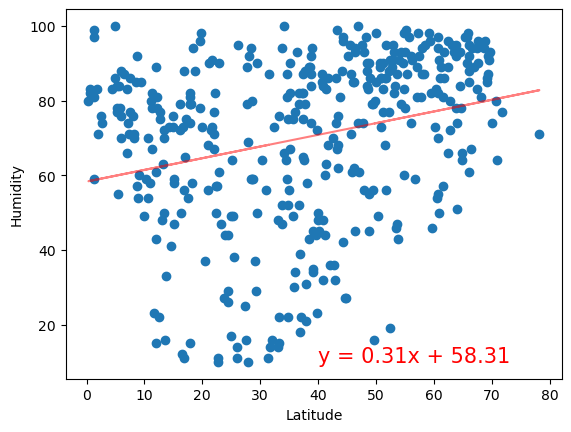

In [69]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is: 0.20177557512838878


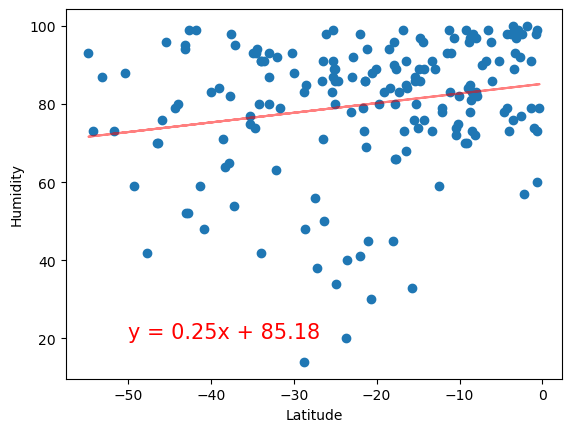

In [70]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)

**Discussion about the linear relationship:** Both Northern and Southern Hempispheres have low to no correlation values when looking at Humiduty vs Latitude. What is interesting is that in both Hemispheres, it appears as if the humidy increases as you go further north, as the regression line plot shows, although due to the weak linear relationship this is seen to be a valuable observation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1628354536984338


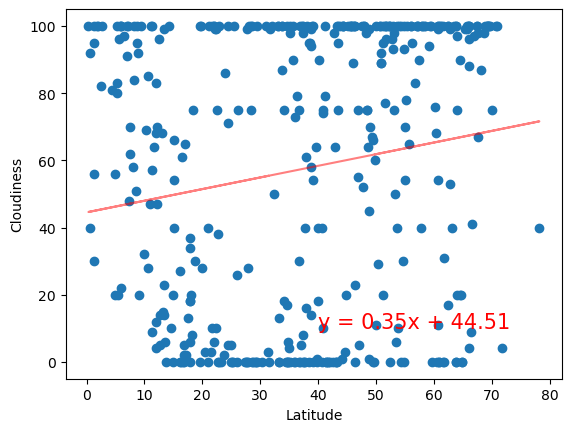

In [74]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 40, 10)

The r-value is: 0.10774194747176087


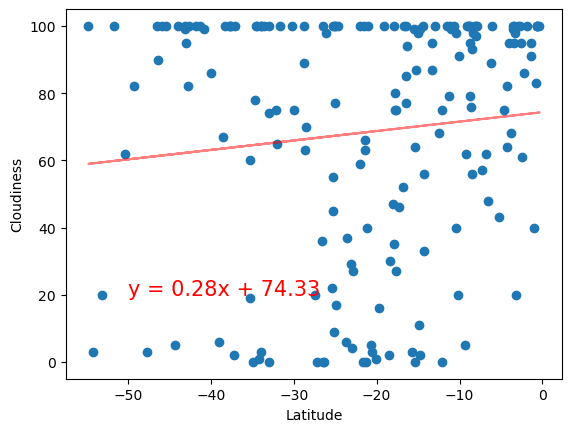

In [76]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 20)

**Discussion about the linear relationship:** Similar to Humidity, both Northern and Southern Hempispheres have low to no correlation values when looking at Cloudiness vs Latitude. Both Hemispheres also appear to increase in cloudiness as you go further north when looking at the regression line, but again the data is too varibale to claim this is a valuable observation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13291904677680474


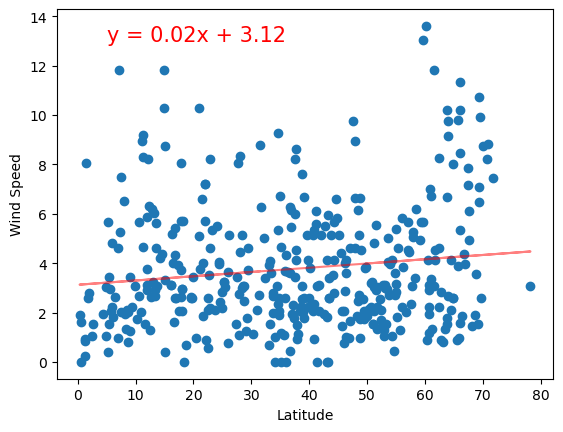

In [79]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 5, 13)

The r-value is: -0.29288486064053154


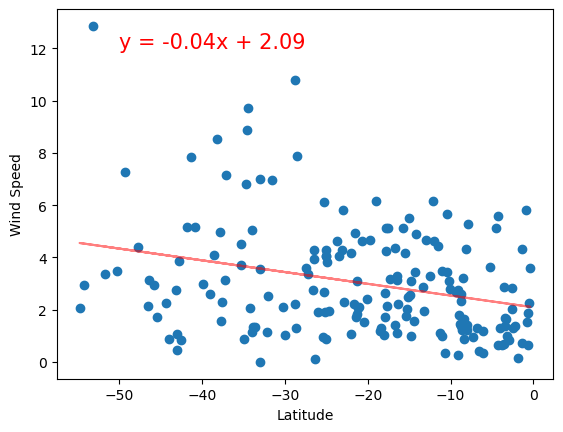

In [80]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 12)

**Discussion about the linear relationship:** Like Humidity and CLoudiness, Wind Speed vs Latitude shows low to no correlation. There is a very slight increase with wind speed as you get closer towards both poles, but agian the data is rather variable.